In [2]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
benefits_cost_sharing = pd.read_csv('BenefitsCostSharing.csv')

//anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (3,6,9,10,16,17,18) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
business_rules = pd.read_csv('BusinessRules.csv')

In [5]:
network = pd.read_csv('Network.csv')

In [6]:
plan_attributes = pd.read_csv('PlanAttributes.csv')

//anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (0,7,8,9,10,11,12,13,14,15,18,19,20,22,23,24,25,26,27,28,29,31,32,33,34,39,40,41,42,66,67,68,70,71,72,75,76,77,79,80,81,82,84,85,86,88,89,90,92,93,94,96,97,98,136,137,138,140,141,142,145,146,147,150,151,152,154,155,156,158,159,160,162,163,164,166,167,168) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [7]:
rates = pd.read_csv('Rate.csv')

In [ ]:
print benefits_cost_sharing.shape
print business_rules.shape
print network.shape
print plan_attributes.shape

In [ ]:
benefits_cost_sharing.isnull().sum()

In [8]:
benefits_cost_sharing.head()

ERROR! Session/line number was not unique in database. History logging moved to new session 1624


,BenefitName,BusinessYear,CoinsInnTier1,CoinsInnTier2,CoinsOutofNet,CopayInnTier1,CopayInnTier2,CopayOutofNet,EHBVarReason,Exclusions,...,LimitUnit,MinimumStay,PlanId,QuantLimitOnSvc,RowNumber,SourceName,StandardComponentId,StateCode,StateCode2,VersionNum
0,Routine Dental Services (Adult),2014,20%,NaN,20%,No Charge,NaN,No Charge,Above EHB,NaN,...,Dollars per Year,NaN,21989AK0010001-00,Yes,68,HIOS,21989AK0010001,AK,AK,6
1,Dental Check-Up for Children,2014,20%,NaN,20%,No Charge,NaN,No Charge,Substantially Equal,NaN,...,Visit(s) per 6 Months,NaN,21989AK0010001-00,Yes,104,HIOS,21989AK0010001,AK,AK,6
2,Basic Dental Care - Child,2014,40%,NaN,40%,No Charge,NaN,No Charge,Substantially Equal,NaN,...,NaN,NaN,21989AK0010001-00,NaN,110,HIOS,21989AK0010001,AK,AK,6
3,Orthodontia - Child,2014,50%,NaN,50%,No Charge,NaN,No Charge,Additional EHB Benefit,NaN,...,NaN,NaN,21989AK0010001-00,NaN,111,HIOS,21989AK0010001,AK,AK,6
4,Major Dental Care - Child,2014,50%,NaN,50%,No Charge,NaN,No Charge,Substantially Equal,NaN,...,NaN,NaN,21989AK0010001-00,NaN,112,HIOS,21989AK0010001,AK,AK,6


In [9]:
benefits_cost_sharing.drop('StateCode2',axis=1,inplace=True)

In [10]:
benefits_cost_sharing.drop('VersionNum',axis=1,inplace=True)

In [11]:
benefits_cost_sharing.drop('IssuerId2',axis=1,inplace=True)

In [12]:
benefits_cost_sharing.CopayOutofNet.replace("No Charge",0,inplace=True)
benefits_cost_sharing.CopayOutofNet.replace("Nan",None,inplace=True)
benefits_cost_sharing.CopayOutofNet.replace("Not Applicable",None,inplace=True)

In [13]:
benefits_cost_sharing.head()

,BenefitName,BusinessYear,CoinsInnTier1,CoinsInnTier2,CoinsOutofNet,CopayInnTier1,CopayInnTier2,CopayOutofNet,EHBVarReason,Exclusions,...,IssuerId,LimitQty,LimitUnit,MinimumStay,PlanId,QuantLimitOnSvc,RowNumber,SourceName,StandardComponentId,StateCode
0,Routine Dental Services (Adult),2014,20%,NaN,20%,No Charge,NaN,0,Above EHB,NaN,...,21989,1000.0,Dollars per Year,NaN,21989AK0010001-00,Yes,68,HIOS,21989AK0010001,AK
1,Dental Check-Up for Children,2014,20%,NaN,20%,No Charge,NaN,0,Substantially Equal,NaN,...,21989,1.0,Visit(s) per 6 Months,NaN,21989AK0010001-00,Yes,104,HIOS,21989AK0010001,AK
2,Basic Dental Care - Child,2014,40%,NaN,40%,No Charge,NaN,0,Substantially Equal,NaN,...,21989,NaN,NaN,NaN,21989AK0010001-00,NaN,110,HIOS,21989AK0010001,AK
3,Orthodontia - Child,2014,50%,NaN,50%,No Charge,NaN,0,Additional EHB Benefit,NaN,...,21989,NaN,NaN,NaN,21989AK0010001-00,NaN,111,HIOS,21989AK0010001,AK
4,Major Dental Care - Child,2014,50%,NaN,50%,No Charge,NaN,0,Substantially Equal,NaN,...,21989,NaN,NaN,NaN,21989AK0010001-00,NaN,112,HIOS,21989AK0010001,AK


In [14]:
benefits_cost_sharing[benefits_cost_sharing.CoinsInnTier1!='NaN'].head()

,BenefitName,BusinessYear,CoinsInnTier1,CoinsInnTier2,CoinsOutofNet,CopayInnTier1,CopayInnTier2,CopayOutofNet,EHBVarReason,Exclusions,...,IssuerId,LimitQty,LimitUnit,MinimumStay,PlanId,QuantLimitOnSvc,RowNumber,SourceName,StandardComponentId,StateCode
0,Routine Dental Services (Adult),2014,20%,NaN,20%,No Charge,NaN,0,Above EHB,NaN,...,21989,1000.0,Dollars per Year,NaN,21989AK0010001-00,Yes,68,HIOS,21989AK0010001,AK
1,Dental Check-Up for Children,2014,20%,NaN,20%,No Charge,NaN,0,Substantially Equal,NaN,...,21989,1.0,Visit(s) per 6 Months,NaN,21989AK0010001-00,Yes,104,HIOS,21989AK0010001,AK
2,Basic Dental Care - Child,2014,40%,NaN,40%,No Charge,NaN,0,Substantially Equal,NaN,...,21989,NaN,NaN,NaN,21989AK0010001-00,NaN,110,HIOS,21989AK0010001,AK
3,Orthodontia - Child,2014,50%,NaN,50%,No Charge,NaN,0,Additional EHB Benefit,NaN,...,21989,NaN,NaN,NaN,21989AK0010001-00,NaN,111,HIOS,21989AK0010001,AK
4,Major Dental Care - Child,2014,50%,NaN,50%,No Charge,NaN,0,Substantially Equal,NaN,...,21989,NaN,NaN,NaN,21989AK0010001-00,NaN,112,HIOS,21989AK0010001,AK


In [15]:
benefits_cost_sharing[benefits_cost_sharing.BenefitName=='Routine Dental Services (Adult)'].head()

,BenefitName,BusinessYear,CoinsInnTier1,CoinsInnTier2,CoinsOutofNet,CopayInnTier1,CopayInnTier2,CopayOutofNet,EHBVarReason,Exclusions,...,IssuerId,LimitQty,LimitUnit,MinimumStay,PlanId,QuantLimitOnSvc,RowNumber,SourceName,StandardComponentId,StateCode
0,Routine Dental Services (Adult),2014,20%,NaN,20%,No Charge,NaN,0,Above EHB,NaN,...,21989,1000.0,Dollars per Year,NaN,21989AK0010001-00,Yes,68,HIOS,21989AK0010001,AK
9,Routine Dental Services (Adult),2014,20%,NaN,20%,No Charge,NaN,0,Above EHB,NaN,...,21989,1000.0,Dollars per Year,NaN,21989AK0010001-01,Yes,68,HIOS,21989AK0010001,AK
18,Routine Dental Services (Adult),2014,0%,NaN,0%,No Charge,NaN,0,Above EHB,NaN,...,21989,1000.0,Dollars per Year,NaN,21989AK0020001-00,Yes,68,HIOS,21989AK0020001,AK
27,Routine Dental Services (Adult),2014,0%,NaN,0%,No Charge,NaN,0,Above EHB,NaN,...,21989,1000.0,Dollars per Year,NaN,21989AK0020001-01,Yes,68,HIOS,21989AK0020001,AK
36,Routine Dental Services (Adult),2014,20%,NaN,20%,No Charge,NaN,0,Above EHB,NaN,...,21989,1000.0,Dollars per Year,NaN,21989AK0020002-00,Yes,68,HIOS,21989AK0020002,AK


In [16]:
benefits_cost_sharing.groupby('BenefitName').describe()


KeyboardInterrupt


In [24]:
individualRate_state = rates[['StateCode','IndividualRate']].groupby('StateCode').mean().sort_values('IndividualRate',ascending=False)

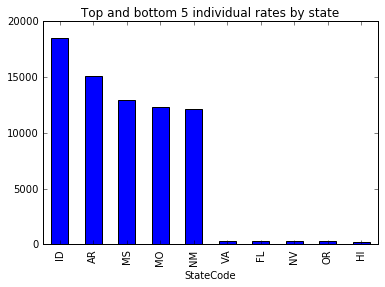

In [28]:
pd.concat([individualRate_state.IndividualRate.head(),individualRate_state.IndividualRate.tail()]).plot(
    kind='bar',title='Top and bottom 5 individual rates by state')